# Need to clean-up this notebook!

In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
from matplotlib.lines import Line2D
from matplotlib.legend import Legend

In [52]:
AHe=pd.read_csv("/Users/smoron/Documents/1.Projects/Thermochron/Thermochron_figs&tables_sub/Table_3.csv",sep=',', header=0)
marker=pd.read_csv("/Users/smoron/Documents/1.Projects/Thermochron/Thermochron_revisions/Table3_marker_key.csv",sep=',', header=0)
samples=np.unique(AHe.Sample_No)                   
marker_samples=np.unique(marker.sampleID)  
# print(samples)
# print(marker)

# Calculating r-square values so I can sort the samples

In [4]:
r_square_eU_0=np.zeros(len(samples))
for i in np.arange(0,len(samples),1):
    r_square_eU_0[i]=round(scipy.stats.linregress(AHe.eU_ppm[AHe.Sample_No==samples[i]], AHe.Corrected_Age_Ma[AHe.Sample_No==samples[i]])[2]**2,2)

r_square_Rs_0=np.zeros(len(samples))
for i in np.arange(0,len(samples),1):
    r_square_Rs_0[i]=round(scipy.stats.linregress(AHe.Rs_um[AHe.Sample_No==samples[i]], AHe.Corrected_Age_Ma[AHe.Sample_No==samples[i]])[2]**2,2)


In [ ]:

# for i in np.arange(0,len(samples),1):
#     print(str(samples[i])+' ' +str(r_square_eU_0[i]))

In [ ]:
# for i in np.arange(0,len(samples),1):
#     print(str(samples[i])+' ' +str(r_square_Rs_0[i]))

In [ ]:
# r_square_eU_0=np.zeros(len(samples))
# for i in np.arange(0,len(samples),1):
#     r_square_eU_0[i]=round(scipy.stats.linregress(AHe.eU_ppm[AHe.Sample_No==samples[i]], AHe.Corrected_Age_Ma[AHe.Sample_No==samples[i]])[2]**2,2)

# r_square_Rs_0=np.zeros(len(samples))
# for i in np.arange(0,len(samples),1):
#     r_square_Rs_0[i]=round(scipy.stats.linregress(AHe.Rs_um[AHe.Sample_No==samples[i]], AHe.Corrected_Age_Ma[AHe.Sample_No==samples[i]])[2]**2,2)

# # for i in np.arange(0,len(samples),1):
# #     print(str(samples[i])+' ' +str(r_square_eU[i]))

In [5]:
samples_r2=['0705-19', 'UW98-41', 'UW98-29', '7315-41', 'UW98-28', '7315-18', 'UW98-17', 'UW98-23', '8010-25', 'UW98-34', '0705-03', 'UW98-27']
sorted(r_square_eU_0, reverse=True)

#Calculate r-square with sorted samples to make sure every matches
r_square_eU=np.zeros(len(samples_r2))
for i in np.arange(0,len(samples_r2),1):
    r_square_eU[i]=round(scipy.stats.linregress(AHe.eU_ppm[AHe.Sample_No==samples_r2[i]], AHe.Corrected_Age_Ma[AHe.Sample_No==samples_r2[i]])[2]**2,2)

r_square_Rs=np.zeros(len(samples_r2))
for i in np.arange(0,len(samples_r2),1):
    r_square_Rs[i]=round(scipy.stats.linregress(AHe.Rs_um[AHe.Sample_No==samples_r2[i]], AHe.Corrected_Age_Ma[AHe.Sample_No==samples_r2[i]])[2]**2,2)

#Checking it matches
print(sorted(r_square_eU_0, reverse=True))
r_square_eU

[0.71, 0.46, 0.45, 0.39, 0.25, 0.22, 0.11, 0.08, 0.06, 0.02, 0.01, 0.0]


array([0.71, 0.46, 0.45, 0.39, 0.25, 0.22, 0.11, 0.08, 0.06, 0.02, 0.01,
       0.  ])

In [6]:
#To be improved
cmap = plt.get_cmap('nipy_spectral')
norm = mcolors.Normalize(vmin=0, vmax=(len(samples_r2))-1)

timestep=np.arange(0,len(samples_r2),1)
def get_colour(timestep):
    return cmap(norm(timestep))
c=cmap(norm(timestep))

#This is a way to create a color map for each data point, making sure that they are color-coded by sample
c0705_19=np.tile(c[0], (len(marker.sampleID[marker.sampleID=='0705-19']), 1))
cUW98_41=np.tile(c[1], (len(marker.sampleID[marker.sampleID=='UW98-41']), 1))
cUW98_29=np.tile(c[2], (len(marker.sampleID[marker.sampleID=='UW98-29']), 1))
c7315_41=np.tile(c[3], (len(marker.sampleID[marker.sampleID=='7315-41']), 1))
cUW98_28=np.tile(c[4], (len(marker.sampleID[marker.sampleID=='UW98-28']), 1))
c7315_18=np.tile(c[5], (len(marker.sampleID[marker.sampleID=='7315-18']), 1))
cUW98_17=np.tile(c[6], (len(marker.sampleID[marker.sampleID=='UW98-17']), 1))
cUW98_23=np.tile(c[7], (len(marker.sampleID[marker.sampleID=='UW98-23']), 1))
c8010_25=np.tile(c[8], (len(marker.sampleID[marker.sampleID=='8010-25']), 1))
cUW98_34=np.tile(c[9], (len(marker.sampleID[marker.sampleID=='UW98-34']), 1))
c0705_03=np.tile(c[10], (len(marker.sampleID[marker.sampleID=='0705-03']), 1))
cUW98_27=np.tile(c[11], (len(marker.sampleID[marker.sampleID=='UW98-27']), 1))
cs=( np.vstack((c0705_19,cUW98_41,cUW98_29,c7315_41, cUW98_28,c7315_18, cUW98_17,
               cUW98_23,c8010_25,cUW98_34, c0705_03, cUW98_27 )))
#cs

In [7]:
legend_elements1_eU=[ mlines.Line2D([], [], marker='o', color=c[0], label=samples_r2[0]+str(' $R^2$=')+str(r_square_eU[0]),markersize=5, linestyle='None')
                , mlines.Line2D([], [], marker='o', color=c[1], label=samples_r2[1]+str(' $R^2$=')+str(r_square_eU[1]),markersize=5, linestyle='None')
                , mlines.Line2D([], [], marker='o', color=c[2], label=samples_r2[2]+str(' $R^2$=')+str(r_square_eU[2]),markersize=5, linestyle='None')]

legend_elements1_Rs=[ mlines.Line2D([], [], marker='o', color=c[0], label=samples_r2[0]+str(' $R^2$=')+str(r_square_Rs[0]),markersize=5, linestyle='None')
                , mlines.Line2D([], [], marker='o', color=c[1], label=samples_r2[1]+str(' $R^2$=')+str(r_square_Rs[1]),markersize=5, linestyle='None')
                , mlines.Line2D([], [], marker='o', color=c[2], label=samples_r2[2]+str(' $R^2$=')+str(r_square_Rs[2]),markersize=5, linestyle='None')]
legend_GM_1=[mlines.Line2D([], [], marker='o', color='k',mfc='w', label='0T',markersize=5, linestyle='None')]

legend_elements2_eU=[ mlines.Line2D([], [], marker='o', color=c[3], label=samples_r2[3]+str(' $R^2$=')+str(r_square_eU[3]),markersize=5, linestyle='None')
                , mlines.Line2D([], [], marker='o', color=c[4], label=samples_r2[4]+str(' $R^2$=')+str(r_square_eU[4]),markersize=5, linestyle='None')
                , mlines.Line2D([], [], marker='o', color=c[5], label=samples_r2[5]+str(' $R^2$=')+str(r_square_eU[5]),markersize=5, linestyle='None')
                , mlines.Line2D([], [], marker='o', color=c[6], label=samples_r2[6]+str(' $R^2$=')+str(r_square_eU[6]),markersize=5, linestyle='None')]

legend_elements2_Rs=[ mlines.Line2D([], [], marker='o', color=c[3], label=samples_r2[3]+str(' $R^2$=')+str(r_square_Rs[3]),markersize=5, linestyle='None')
                , mlines.Line2D([], [], marker='o', color=c[4], label=samples_r2[4]+str(' $R^2$=')+str(r_square_Rs[4]),markersize=5, linestyle='None')
                , mlines.Line2D([], [], marker='o', color=c[5], label=samples_r2[5]+str(' $R^2$=')+str(r_square_Rs[5]),markersize=5, linestyle='None')
                , mlines.Line2D([], [], marker='o', color=c[6], label=samples_r2[6]+str(' $R^2$=')+str(r_square_Rs[6]),markersize=5, linestyle='None')]

legend_GM_2=[ mlines.Line2D([], [], marker='o', color='k', mfc='w', label='0T',markersize=5, linestyle='None')
                , mlines.Line2D([], [], marker='s', color='k', mfc='w',label='1T',markersize=5, linestyle='None')
                , mlines.Line2D([], [], marker='d', color='k', mfc='w',label='2T',markersize=5, linestyle='None')]

legend_elements3_eU=[ mlines.Line2D([], [], marker='o', color=c[7], label=samples_r2[7]+str(' $R^2$=')+str(r_square_eU[7]),markersize=5, linestyle='None')
                , mlines.Line2D([], [], marker='o', color=c[8], label=samples_r2[8]+str(' $R^2$=')+str(r_square_eU[8]),markersize=5, linestyle='None')
                , mlines.Line2D([], [], marker='o', color=c[9], label=samples_r2[9]+str(' $R^2$=')+str(r_square_eU[9]),markersize=5, linestyle='None')
                , mlines.Line2D([], [], marker='o', color=c[10], label=samples_r2[10]+str(' $R^2$=')+str(r_square_eU[10]),markersize=5, linestyle='None')
                , mlines.Line2D([], [], marker='o', color=c[11], label=samples_r2[11]+str(' $R^2$=')+str(r_square_eU[11]),markersize=5, linestyle='None')]




legend_elements3_Rs=[ mlines.Line2D([], [], marker='o', color=c[7], label=samples_r2[7]+str(' $R^2$=')+str(r_square_Rs[7]),markersize=5, linestyle='None')
                , mlines.Line2D([], [], marker='o', color=c[8], label=samples_r2[8]+str(' $R^2$=')+str(r_square_Rs[8]),markersize=5, linestyle='None')
                , mlines.Line2D([], [], marker='o', color=c[9], label=samples_r2[9]+str(' $R^2$=')+str(r_square_Rs[9]),markersize=5, linestyle='None')
                , mlines.Line2D([], [], marker='o', color=c[10], label=samples_r2[10]+str(' $R^2$=')+str(r_square_Rs[10]),markersize=5, linestyle='None')
                , mlines.Line2D([], [], marker='o', color=c[11], label=samples_r2[11]+str(' $R^2$=')+str(r_square_Rs[11]),markersize=5, linestyle='None')]


legend_GM_3=[mlines.Line2D([], [], marker='o', color='k', mfc='w',label='0T',markersize=5, linestyle='None')
            , mlines.Line2D([], [], marker='s', color='k', mfc='w',label='1T',markersize=5, linestyle='None')]



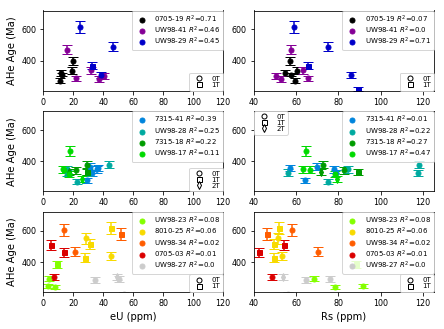

In [64]:
fig, axs = plt.subplots(3,2, figsize=(6, 11/2.5))
ms=5
lfs=7
lbp=0
lls=0.00001
#lls=1
ls=8
xlim=(0,120)
##########
#eU plots#
##########
ax = axs[0,0]
for j in np.arange(0,(np.int(np.argwhere(marker.sampleID=='UW98-29')[-1]))+1,1):
        ax.errorbar(AHe.eU_ppm[marker.locator[j]], AHe.Corrected_Age_Ma[marker.locator[j]], 
            yerr=AHe.Corrected_Age_Ma_1s[marker.locator[j]],
            fmt=str(marker.marker[j]),c=cs[j],capsize=5,ms=ms)
ax.set_xlim(xlim)
ax.set_ylim(210,720)
ax.set(ylabel='AHe Age (Ma)')
ax.tick_params(axis='both', which='major', labelsize=ls)
legend1= ax.legend(handles=legend_elements1_eU, borderaxespad=lbp, fontsize=lfs, labelspacing=lls)
ax.add_artist(legend1)
legend2 = ax.legend(handles=legend_GM_3, borderaxespad=lbp, fontsize=lfs, labelspacing=lls, loc='lower right')

###
ax = axs[1,0]
for k in np.arange(np.int(np.argwhere(marker.sampleID=='7315-41')[0]),
                   np.int(np.argwhere(marker.sampleID=='UW98-17')[-1])+1,1):
        ax.errorbar(AHe.eU_ppm[marker.locator[k]], AHe.Corrected_Age_Ma[marker.locator[k]], 
            yerr=AHe.Corrected_Age_Ma_1s[marker.locator[k]],
            fmt=str(marker.marker[k]),c=cs[k],capsize=5,ms=ms)
ax.set_xlim(xlim)
ax.set_ylim(210,720)
ax.set(ylabel='AHe Age (Ma)')
ax.tick_params(axis='both', which='major', labelsize=ls)   
legend1=ax.legend(handles=legend_elements2_eU, borderaxespad=lbp, fontsize=lfs, labelspacing=lls)
ax.add_artist(legend1)
legend2 = ax.legend(handles=legend_GM_2, borderaxespad=lbp, fontsize=lfs, labelspacing=lls, loc='lower right')

####
ax = axs[2,0]
for l in np.arange(np.int(np.argwhere(marker.sampleID=='UW98-23')[0]),
                   np.int(np.argwhere(marker.sampleID=='UW98-27')[-1])+1,1):
        ax.errorbar(AHe.eU_ppm[marker.locator[l]], AHe.Corrected_Age_Ma[marker.locator[l]], 
            yerr=AHe.Corrected_Age_Ma_1s[marker.locator[l]],
            fmt=str(marker.marker[l]),c=cs[l],capsize=5,ms=ms)
ax.set_xlim(xlim)
ax.set_ylim(210,720)
ax.set(ylabel='AHe Age (Ma)', xlabel="eU (ppm)")
ax.tick_params(axis='both', which='major', labelsize=ls)
legend1=ax.legend(handles=legend_elements3_eU, borderaxespad=lbp, fontsize=lfs, labelspacing=lls)
ax.add_artist(legend1)
legend2 = ax.legend(handles=legend_GM_3, borderaxespad=lbp, fontsize=lfs, labelspacing=lls, loc='lower right')

##########
#Rs plots#
##########
ax = axs[0,1]
for j in np.arange(0,(np.int(np.argwhere(marker.sampleID=='UW98-29')[-1]))+1,1):
        ax.errorbar(AHe.Rs_um[marker.locator[j]], AHe.Corrected_Age_Ma[marker.locator[j]], 
            yerr=AHe.Corrected_Age_Ma_1s[marker.locator[j]],
            fmt=str(marker.marker[j]),c=cs[j],capsize=5,ms=ms)
ax.set_xlim(40,125)
ax.set_ylim(210,720)
ax.tick_params(axis='both', which='major', labelsize=ls)
legend1= ax.legend(handles=legend_elements1_Rs, borderaxespad=lbp, fontsize=lfs, labelspacing=lls)
ax.add_artist(legend1)
legend2 = ax.legend(handles=legend_GM_3, borderaxespad=lbp, fontsize=lfs, labelspacing=lls, loc='lower right')

###
ax = axs[1,1]
for k in np.arange(np.int(np.argwhere(marker.sampleID=='7315-41')[0]),
                   np.int(np.argwhere(marker.sampleID=='UW98-17')[-1])+1,1):
        ax.errorbar(AHe.Rs_um[marker.locator[k]], AHe.Corrected_Age_Ma[marker.locator[k]], 
            yerr=AHe.Corrected_Age_Ma_1s[marker.locator[k]],
            fmt=str(marker.marker[k]),c=cs[k],capsize=5,ms=ms)
ax.set_xlim(40,125)
ax.set_ylim(210,720)
ax.tick_params(axis='both', which='major', labelsize=ls)   
legend1=ax.legend(handles=legend_elements2_Rs, borderaxespad=lbp, fontsize=lfs, labelspacing=lls)
ax.add_artist(legend1)
legend2 = ax.legend(handles=legend_GM_2, borderaxespad=lbp, fontsize=lfs, labelspacing=lls, loc='upper left')

####
ax = axs[2,1]
for l in np.arange(np.int(np.argwhere(marker.sampleID=='UW98-23')[0]),
                   np.int(np.argwhere(marker.sampleID=='UW98-27')[-1])+1,1):
        ax.errorbar(AHe.Rs_um[marker.locator[l]], AHe.Corrected_Age_Ma[marker.locator[l]], 
            yerr=AHe.Corrected_Age_Ma_1s[marker.locator[l]],
            fmt=str(marker.marker[l]),c=cs[l],capsize=5,ms=ms)
ax.set_xlim(40,125)
ax.set_ylim(210,720)
ax.set(xlabel="Rs (ppm)")
ax.tick_params(axis='both', which='major', labelsize=ls)
legend1=ax.legend(handles=legend_elements3_eU, borderaxespad=lbp, fontsize=lfs, labelspacing=lls)
ax.add_artist(legend1)
legend2 = ax.legend(handles=legend_GM_3, borderaxespad=lbp, fontsize=lfs, labelspacing=lls, loc='lower right')
plt.tight_layout(pad=0.10)

fig.savefig("AHe_age_vs_eU_vsRs_groupedbysample_nipy_spectral_all.pdf", dpi=300)


In [ ]:
#Modify symbol's legend, that's the old one
#Change le

In [53]:
#marker.sampleID 0705-19

AHe.eU_ppm[AHe.Sample_No=='0705-19']
np.arange(0,(np.int(np.argwhere(marker.sampleID=='0705-19')[-1])),1)
AHe.eU_ppm[marker.locator[0]]

18.9

3
4
5
6
7


<ErrorbarContainer object of 3 artists>

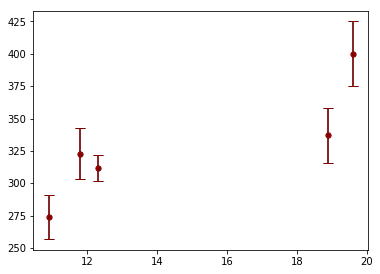

In [50]:
#It seems that there is something wrong with the sample plotting
fig, axs = plt.subplots(1, figsize=(6, 11/2.5))

j=0
for j in np.arange(0,(np.int(np.argwhere(markerk.sampleID=='0705-19')[-1])+1),1):
        #print(j)
        print(markerk.locator[j])
        plt.errorbar(AHe.eU_ppm[markerk.locator[j]], AHe.Corrected_Age_Ma[markerk.locator[j]], 
            yerr=AHe.Corrected_Age_Ma_1s[markerk.locator[j]],
            fmt=str(markerk.marker[j]),c=cs[j],capsize=5,ms=ms)
plt.errorbar(AHe.eU_ppm[AHe.Sample_No=='0705-19'], AHe.Corrected_Age_Ma[AHe.Sample_No=='0705-19'], 
            yerr=AHe.Corrected_Age_Ma_1s[AHe.Sample_No=='0705-19'],
            fmt='o',c=(1,0,0,.5),capsize=5,ms=ms)


In [58]:
ax = axs[1,0]
for k in np.arange(np.int(np.argwhere(marker.sampleID=='7315-41')[0]),
                   np.int(np.argwhere(marker.sampleID=='UW98-17')[-1])+1,1):
        print (marker.locator[k])
        ax.errorbar(AHe.eU_ppm[marker.locator[k]], AHe.Corrected_Age_Ma[marker.locator[k]], 
            yerr=AHe.Corrected_Age_Ma_1s[marker.locator[k]],
            fmt=str(marker.marker[k]),c=cs[k],capsize=5,ms=ms)
ax.set_xlim(xlim)
ax.set_ylim(210,720)
ax.set(ylabel='AHe Age (Ma)')
ax.tick_params(axis='both', which='major', labelsize=ls)   
legend1=ax.legend(handles=legend_elements2_eU, borderaxespad=lbp, fontsize=lfs, labelspacing=lls)
ax.add_artist(legend1)
legend2 = ax.legend(handles=legend_GM_2, borderaxespad=lbp, fontsize=lfs, labelspacing=lls, loc='lower right')


12
13
14
15
16
37
38
39
40
41
8
9
10
11
22
23
24
25
26


12
13
14
15
16
37
38
39
40
41
8
9
10
11
22
23
24
25
26


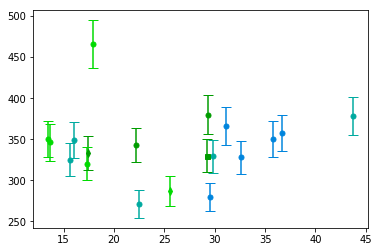

In [62]:

for k in np.arange(np.int(np.argwhere(marker.sampleID=='7315-41')[0]),
                   np.int(np.argwhere(marker.sampleID=='UW98-17')[-1])+1,1):
        print(marker.locator[k])
        plt.errorbar(AHe.eU_ppm[marker.locator[k]], AHe.Corrected_Age_Ma[marker.locator[k]], 
            yerr=AHe.Corrected_Age_Ma_1s[marker.locator[k]],
            fmt=str(marker.marker[k]),c=cs[k],capsize=5,ms=ms)
ax.set_xlim(xlim)
ax.set_ylim(210,720)
ax.set(ylabel='AHe Age (Ma)')
ax.tick_params(axis='both', which='major', labelsize=ls)   
legend1=ax.legend(handles=legend_elements2_eU, borderaxespad=lbp, fontsize=lfs, labelspacing=lls)
ax.add_artist(legend1)
legend2 = ax.legend(handles=legend_GM_2, borderaxespad=lbp, fontsize=lfs, labelspacing=lls, loc='lower right')


In [ ]:
cmap = plt.get_cmap('nipy_spectral')
norm = mcolors.Normalize(vmin=0, vmax=(len(samples_r2))-1)

timestep=np.arange(0,len(samples_r2),1)
def get_colour(timestep):
    return cmap(norm(timestep))
c=cmap(norm(timestep))

# cc=np.zeros(len(marker.marker))
# for j in np.arange(0,4,1):
#     cc[j]=c[0]
type(c[0][0])
panel1c=[[c[1]]*5]
#panel1c=(c[1]*3)#This just multiplies each of the elements of the array by 3

# type(panel1c)
# panel1c
# a=c[0]
# b=c[0]
# print( np.vstack((a,b)))#the first one doesn't have comas inbetween
# print(np.concatenate((c[0],c[0])))#the second one is just a long 'list'
# #print(panel1c)
print(c)
# c2=[c[0],c[0]]
# print(c2)
# c2[1]

In [ ]:
samples_r2

In [ ]:
np.argwhere(marker.sampleID==samples_r2[0])[-1]

In [ ]:
for i in np.arange(0,len(samples_r2),1):
     plt.plot(AHe.eU_ppm[AHe.Sample_No==samples_r2[i]], 
              AHe.Corrected_Age_Ma[AHe.Sample_No==samples_r2[i]],
              'o', c=c[i], label=samples_r2[i])
plt.legend()

In [ ]:
r_square_eU=np.zeros(len(samples_r2))
for i in np.arange(0,len(samples_r2),1):
    r_square_eU[i]=round(scipy.stats.linregress(AHe.eU_ppm[AHe.Sample_No==samples_r2[i]], AHe.Corrected_Age_Ma[AHe.Sample_No==samples_r2[i]])[2]**2,2)

r_square_Rs=np.zeros(len(samples_r2))
for i in np.arange(0,len(samples_r2),1):
    r_square_Rs[i]=round(scipy.stats.linregress(AHe.Rs_um[AHe.Sample_No==samples_r2[i]], AHe.Corrected_Age_Ma[AHe.Sample_No==samples_r2[i]])[2]**2,2)


# Define legend elements so that legends don't have error bars

In [ ]:
# list inside an array and then flatten in, and then I guess I convert 0T to 'o', 1T to's' and 2T to 'd'
# import numpy as np
# a = np.array([2, 2, 2, 0, 2, 0, 2])
# a_v2=np.where(array1==0, 1, array1)
# print(a)
# a_v2

# C_v2=np.where(C=='0T', 'o', C)
# C_v2
D=C.flatten()
b=np.asarray(D[1])
#for i in C:
#print(len(D))
# for i in np.arange(0,len(D),1):
#     if np.asarray(D[i]=='0T'):
#         np.where(np.asarray(D[i])=='0T', 'o', np.asarray(D[i]))

np.where(np.asarray(D[1]=='0T'))

In [ ]:
#How do I create a and array with lists inside?
B=[[]]*len(samples_r2)
# C=np.array([[]]*len(samples_r2))
# type(C)
# print (C)
# D=[[],[],[]]
   
for i in np.arange(0,len(samples_r2),1):
    B[i]=(AHe.Grain_morphology[AHe.Sample_No==samples_r2[i]])
B[1]
C= np.asarray(B)

samplegm0=np.zeros(len(D[0]))
samplegm1=np.zeros(len(D[1]))
samplegm2=np.zeros(len(D[2]))
samplegm3=np.zeros(len(D[3]))
samplegm4=np.zeros(len(D[4]))
samplegm5=np.zeros(len(D[5]))
samplegm6=np.zeros(len(D[6]))
samplegm7=np.zeros(len(D[7]))
samplegm8=np.zeros(len(D[8]))
samplegm9=np.zeros(len(D[9]))
samplegm10=np.zeros(len(D[10]))
samplegm11=np.zeros(len(D[11]))





In [ ]:
print(len(AHe.Analysis_No))
B

In [ ]:
a=np.zeros(len(D))
for i in np.arange(0,len(D),1):
       a[i]=len(D[i])
        
for i in np.arange(0,len(D),1):
       'str(samplegm)'+str(i)=np.zeros(a)

In [ ]:
str(marker.marker[i])

marker.marker[marker.sampleID==samples_r2[1]]


# SAVE THIS

In [ ]:
#SAVE THIS BECAUSE THIS IS HOW I CREATED THE ORDER FOR THE SYMBOLS
#trying to create an array so that I can create an array with the type of grain morphology 
#so I don't have to do it manually
#the problem is that each sample has a different number of grains

#This works but it is a list of lists and it is storying the index number as well
# B=[[]]*len(samples_r2)
# for i in np.arange(0,len(samples_r2),1):
#     B[i]=(AHe.Grain_morphology[AHe.Sample_No==samples_r2[i]])

In [ ]:
marker

In [ ]:
fig, axs = plt.subplots(3,2, figsize=(7.5, 11/2.5))
ms=5
lfs=7
lbp=0
lls=0.00001
##########
#eU plots#
##########
ax = axs[0,0]    
for i in np.arange(0,4,1):
    ax.errorbar(AHe.eU_ppm[AHe.Sample_No==samples_r2[i]], AHe.Corrected_Age_Ma[AHe.Sample_No==samples_r2[i]], 
                yerr=AHe.Corrected_Age_Ma_1s[AHe.Sample_No==samples_r2[i]], fmt='o', capsize=5,ms=ms,c=c[i])
    ax.set_xlim(0,65)
    ax.set_ylim(210,720)
    ax.set(ylabel='AHe Age (Ma)')
    ax.tick_params(axis='both', which='major', labelsize=7)
legend1= ax.legend(handles=legend_elements1_eU, borderaxespad=lbp, fontsize=lfs, labelspacing=lls)
ax.add_artist(legend1)
legend2 = ax.legend(handles=legend_GM_1, borderaxespad=lbp, fontsize=lfs, labelspacing=lls, loc='lower right')
#
ax = axs[1,0]
#UW98-28- samples_r2[3]
ax.errorbar(AHe.eU_ppm[AHe.Sample_No==samples_r2[3]], AHe.Corrected_Age_Ma[AHe.Sample_No==samples_r2[3]], 
            yerr=AHe.Corrected_Age_Ma_1s[AHe.Sample_No==samples_r2[3]], fmt='o', capsize=5, ms=ms, c=c[3]) 
#7315-18- samples_r2[4]
marker_7315_18=['s','o','d','o']

for i in np.arange(0,len(marker_7315_18),1):
    ax.errorbar(AHe.eU_ppm[i+5], AHe.Corrected_Age_Ma[i+5], yerr=AHe.Corrected_Age_Ma_1s[i+5], fmt='o', capsize=5, ms=ms, marker=marker_7315_18[i],c=c[4])

#UW98-17- samples_r2[5]
UW98_17_0i=[22,24,25,26]
for i in UW98_17_0i:
    ax.errorbar(AHe.eU_ppm[i], AHe.Corrected_Age_Ma[i], yerr=AHe.Corrected_Age_Ma_1s[i], fmt='o', capsize=5, ms=ms, c=c[5])
ax.errorbar(AHe.eU_ppm[23], AHe.Corrected_Age_Ma[23], yerr=AHe.Corrected_Age_Ma_1s[23], fmt='o', capsize=5, ms=ms, c=c[5],marker='d')

ax.set_xlim(0,65)
ax.set_ylim(210,720)
ax.set(ylabel='AHe Age (Ma)')
ax.tick_params(axis='both', which='major', labelsize=7)
legend1=ax.legend(handles=legend_elements2_eU, borderaxespad=lbp, fontsize=lfs, labelspacing=lls)
ax.add_artist(legend1)
legend2 = ax.legend(handles=legend_GM_2, borderaxespad=lbp, fontsize=lfs, labelspacing=lls, loc='lower right')
####
ax = axs[2,0]
#8010-25- samples_r2[6]
ax.errorbar(AHe.eU_ppm[0], AHe.Corrected_Age_Ma[0], yerr=AHe.Corrected_Age_Ma_1s[0], fmt='o', capsize=5, ms=ms, c=c[6])
ax.errorbar(AHe.eU_ppm[2], AHe.Corrected_Age_Ma[2], yerr=AHe.Corrected_Age_Ma_1s[2], fmt='o', capsize=5, ms=ms,c=c[6])
s8010_25_1i=[1,3,4]
for i in s8010_25_1i:
    ax.errorbar(AHe.eU_ppm[i], AHe.Corrected_Age_Ma[i], yerr=AHe.Corrected_Age_Ma_1s[i], fmt='o', capsize=5, ms=ms, marker='s', c=c[6])

#UW98-34- samples_r2[7]
ax.errorbar(AHe.eU_ppm[32], AHe.Corrected_Age_Ma[32], yerr=AHe.Corrected_Age_Ma_1s[32], fmt='o', capsize=5, ms=ms,c=c[7])
ax.errorbar(AHe.eU_ppm[33], AHe.Corrected_Age_Ma[33], yerr=AHe.Corrected_Age_Ma_1s[33], fmt='o', capsize=5, ms=ms,c=c[7])
ax.errorbar(AHe.eU_ppm[34], AHe.Corrected_Age_Ma[34], yerr=AHe.Corrected_Age_Ma_1s[34], fmt='o', capsize=5, ms=ms,marker='s', c=c[7])    
#0705-03- samples_r2[8]
ax.errorbar(AHe.eU_ppm[14], AHe.Corrected_Age_Ma[14], yerr=AHe.Corrected_Age_Ma_1s[14], fmt='o', capsize=5, ms=ms,c=c[8])
ax.errorbar(AHe.eU_ppm[15], AHe.Corrected_Age_Ma[15], yerr=AHe.Corrected_Age_Ma_1s[15], fmt='o', capsize=5, ms=ms,c=c[8])
ax.errorbar(AHe.eU_ppm[16], AHe.Corrected_Age_Ma[16], yerr=AHe.Corrected_Age_Ma_1s[16], fmt='o', capsize=5, ms=4, marker='s',c=c[8])

ax.set_xlim(0,65)
ax.set_ylim(210,720)
ax.set(xlabel='eU (ppm)', ylabel='AHe Age (Ma)')

ax.tick_params(axis='both', which='major', labelsize=7)
legend1=ax.legend(handles=legend_elements3_eU, borderaxespad=lbp, fontsize=lfs, labelspacing=lls)
ax.add_artist(legend1)
legend2 = ax.legend(handles=legend_GM_3, borderaxespad=lbp, fontsize=lfs, labelspacing=lls, loc='upper right')

##########
#Rs plots#
##########
ax = axs[0,1]
for i in np.arange(0,3,1):
    ax.errorbar(AHe.Rs_um[AHe.Sample_No==samples_r2[i]], AHe.Corrected_Age_Ma[AHe.Sample_No==samples_r2[i]], 
                yerr=AHe.Corrected_Age_Ma_1s[AHe.Sample_No==samples_r2[i]], fmt='o', capsize=5, ms=ms,c=c[i])
    ax.set_xlim(40,125)
    ax.set_ylim(210,720)
    ax.tick_params(axis='both', which='major', labelsize=7)
legend1=ax.legend(handles=legend_elements1_Rs, borderaxespad=lbp, fontsize=lfs, labelspacing=lls, )
ax.add_artist(legend1)
legend2 = ax.legend(handles=legend_GM_1, borderaxespad=lbp, fontsize=lfs, labelspacing=lls, loc='lower right')
    

ax = axs[1,1]
#UW98-28- samples_r2[3]
ax.errorbar(AHe.Rs_um[AHe.Sample_No==samples_r2[3]], AHe.Corrected_Age_Ma[AHe.Sample_No==samples_r2[3]], 
            yerr=AHe.Corrected_Age_Ma_1s[AHe.Sample_No==samples_r2[3]], fmt='o', capsize=5, ms=ms, c=c[3])
#7315-18- samples_r2[4]
ax.errorbar(AHe.Rs_um[6], AHe.Corrected_Age_Ma[6], yerr=AHe.Corrected_Age_Ma_1s[6], fmt='o', capsize=5, ms=ms,c=c[4])
ax.errorbar(AHe.Rs_um[8], AHe.Corrected_Age_Ma[8], yerr=AHe.Corrected_Age_Ma_1s[8], fmt='o', capsize=5, ms=ms,c=c[4])
ax.errorbar(AHe.Rs_um[5], AHe.Corrected_Age_Ma[5], yerr=AHe.Corrected_Age_Ma_1s[5], fmt='o', capsize=5, ms=4, marker='s',c=c[4])
ax.errorbar(AHe.Rs_um[7], AHe.Corrected_Age_Ma[7], yerr=AHe.Corrected_Age_Ma_1s[7], fmt='o', capsize=5, ms=4, marker='d',c=c[4])

#UW98-17- samples_r2[5]
UW98_17_0i=[22,24,25,26]
for i in UW98_17_0i:
    ax.errorbar(AHe.Rs_um[i], AHe.Corrected_Age_Ma[i], yerr=AHe.Corrected_Age_Ma_1s[i], fmt='o', capsize=5, ms=ms, c=c[5])
ax.errorbar(AHe.Rs_um[23], AHe.Corrected_Age_Ma[23], yerr=AHe.Corrected_Age_Ma_1s[23], fmt='o', capsize=5, ms=ms, c=c[5],marker='d')
ax.set_xlim(40,125)
ax.set_ylim(210,720)
ax.tick_params(axis='both', which='major', labelsize=7)
legend1=ax.legend(handles=legend_elements2_Rs, borderaxespad=lbp, fontsize=lfs, labelspacing=lls)
ax.add_artist(legend1)
legend2 = ax.legend(handles=legend_GM_2, borderaxespad=lbp, fontsize=lfs, labelspacing=lls, loc='lower left')

ax = axs[2,1]
#8010-25- samples_r2[6]
ax.errorbar(AHe.Rs_um[0], AHe.Corrected_Age_Ma[0], yerr=AHe.Corrected_Age_Ma_1s[0], fmt='o', capsize=5, ms=ms,c=c[6])
ax.errorbar(AHe.Rs_um[2], AHe.Corrected_Age_Ma[2], yerr=AHe.Corrected_Age_Ma_1s[2], fmt='o', capsize=5, ms=ms,c=c[6])

s8010_25_1i=[1,3,4]
for i in s8010_25_1i:
    ax.errorbar(AHe.Rs_um[i], AHe.Corrected_Age_Ma[i], yerr=AHe.Corrected_Age_Ma_1s[i], fmt='o', capsize=5, ms=ms, marker='s', c=c[6])

#UW98-34- samples_r2[7]
ax.errorbar(AHe.Rs_um[32], AHe.Corrected_Age_Ma[32], yerr=AHe.Corrected_Age_Ma_1s[32], fmt='o', capsize=5, ms=ms,c=c[7])
ax.errorbar(AHe.Rs_um[33], AHe.Corrected_Age_Ma[33], yerr=AHe.Corrected_Age_Ma_1s[33], fmt='o', capsize=5, ms=ms,c=c[7])
ax.errorbar(AHe.Rs_um[34], AHe.Corrected_Age_Ma[34], yerr=AHe.Corrected_Age_Ma_1s[34], fmt='o', capsize=5, ms=ms,marker='s', c=c[7])    
#0705-03- samples_r2[8]
ax.errorbar(AHe.Rs_um[14], AHe.Corrected_Age_Ma[14], yerr=AHe.Corrected_Age_Ma_1s[14], fmt='o', capsize=5, ms=ms, c=c[8])
ax.errorbar(AHe.Rs_um[15], AHe.Corrected_Age_Ma[15], yerr=AHe.Corrected_Age_Ma_1s[15], fmt='o', capsize=5, ms=ms,c=c[8])
ax.errorbar(AHe.Rs_um[16], AHe.Corrected_Age_Ma[16], yerr=AHe.Corrected_Age_Ma_1s[16], fmt='o', capsize=5, ms=4, marker='s',c=c[8])

ax.set_xlim(40,125)
ax.set_ylim(210,720)

ax.set(xlabel='Rs ($\mu$m)')
ax.tick_params(axis='both', which='major', labelsize=7)
legend1=ax.legend(handles=legend_elements3_Rs, borderaxespad=lbp, fontsize=lfs, labelspacing=lls)
ax.add_artist(legend1)
legend2 = ax.legend(handles=legend_GM_3, borderaxespad=lbp, fontsize=lfs, labelspacing=lls, loc='lower right')

plt.tight_layout(pad=0.10)
fig.savefig("AHe_age_vs_eU_vsRs_grouped_nobars_nipy_spectral_all.pdf", dpi=300)
